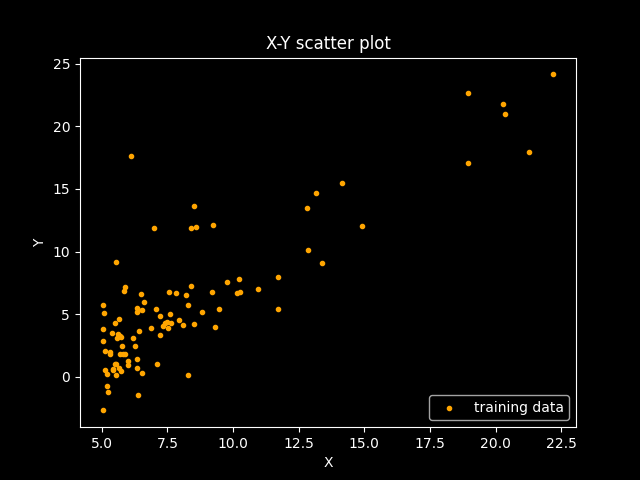

Iteration #0: cost=32.07	w=[0. 0. 0. 0. 0.]	b=0.00, 
Iteration #100: cost=15.70	w=[0.98968594 0.64725375 0.43311975 0.30849534 0.22478873]	b=3.68, 
Iteration #200: cost=12.51	w=[1.90649714 1.13744738 0.78219583 0.55497524 0.40505871]	b=5.00, 
Iteration #300: cost=11.22	w=[2.7584165  1.55058639 1.08574631 0.76815048 0.56115897]	b=5.46, 
Iteration #400: cost=10.30	w=[3.55110282 1.9172802  1.35889622 0.95926732 0.70108683]	b=5.61, 
Iteration #500: cost=9.54	w=[4.28916965 2.25002083 1.60816169 1.13314696 0.8282936 ]	b=5.65, 
Iteration #600: cost=8.88	w=[4.97666585 2.55459732 1.83684726 1.29221561 0.94453413]	b=5.65, 
Iteration #700: cost=8.32	w=[5.61726412 2.83426539 2.04701939 1.43797792 1.05090886]	b=5.63, 
Iteration #800: cost=7.83	w=[6.21434192 3.09127443 2.24023097 1.57155783 1.1482464 ]	b=5.61, 
Iteration #900: cost=7.41	w=[6.77102247 3.32743036 2.41779003 1.69389896 1.23724546]	b=5.59, 
Iteration #1000: cost=7.05	w=[7.29020013 3.54430637 2.58086187 1.80584076 1.31852876]	b=5.57, 
Op

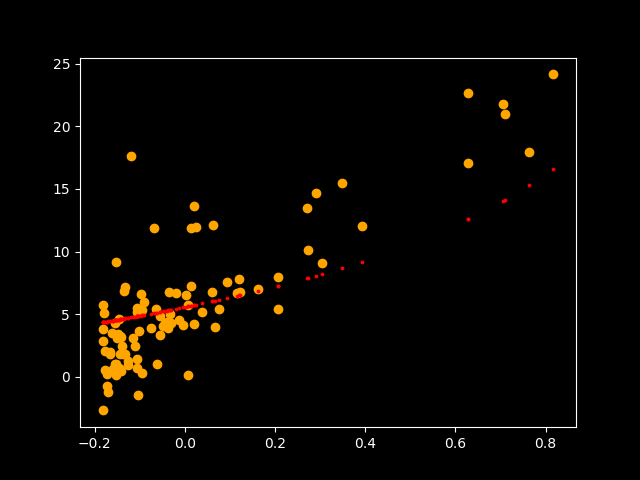

In [63]:
import sys
sys.path.append('../../')
from ML_toolbox import *

## Feature scaling
def mean_normalization(X):
    mean = np.mean(X, axis=0)
    X_max = np.max(X, axis=0)
    X_min = np.min(X, axis=0)
    X_scaled = (X - mean) / (X_max - X_min)
    return X_scaled

## Polynomial Regression one feature
##----------------
# Read and plot training data
X_train, Y_train = read_data('./data/linear_regression_data.txt', feature_count=1)
plot_linear_data(X_train, Y_train)

# Scale data down for GD to work with reasonable alpha values
X_scaled = mean_normalization(X_train)
X_train = X_scaled

# Add polynomial features
X_train = np.hstack((X_train, X_train**2, X_train ** 3, X_train ** 4, X_train ** 5))

# Find optimal w and b using Gradient Descent
initial_w = np.zeros(X_train.shape[1])
initial_b = 0
alpha = 0.01

optimal_w, optimal_b, GD_log = gradient_descent(X_train, Y_train, initial_w, initial_b, alpha, iteration_count=1000, lambda_reg=0, log_verbosity=100, logistic=False)

# Plot training data with the fitting curve
Y_hat = prediction_function(X_train, optimal_w, optimal_b)
plt.scatter(X_train[:,0], Y_train, c='orange')
plt.scatter(X_train[:,0], Y_hat, c='r', s = 3)
plt.show()